This file should serve to read in the prepared data, separate it into X and y and try out the first models

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
dateiName = "23_22_21-eu_combustion.csv"
fields = np.arange(19)
df = pd.read_csv(dateiName, sep = ",",nrows= 15000000, usecols = fields,  index_col =0, header = 0)
df.info()

C:\Users\user\AppData\Local\Temp\ipykernel_12116\1030578682.py:7: DtypeWarning: Columns (4,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(dateiName, sep = ",",nrows= 15000000, usecols = fields,  index_col =0, header = 0)


<class 'pandas.core.frame.DataFrame'>
Index: 15000000 entries, 56002959 to 46441491
Data columns (total 18 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   member_state                 object 
 1   manufacturer_name_eu         object 
 2   vehicle_type                 object 
 3   commercial_name              object 
 4   category_of_vehicle          object 
 5   fuel_type                    object 
 6   fuel_mode                    object 
 7   innovative_technologies      object 
 8   mass_vehicle                 float64
 9   weltp_test_mass              float64
 10  engine_capacity              float64
 11  engine_power                 float64
 12  erwltp                       float64
 13  year                         int64  
 14  electric_range               float64
 15  electric_energy_consumption  float64
 16  fuel_consumption             float64
 17  specific_co2_emissions       float64
dtypes: float64(9), int64(1), object(8)
mem

In [3]:
# Checking which fueltypes are in the dataset
df.head()


,member_state,manufacturer_name_eu,vehicle_type,commercial_name,category_of_vehicle,fuel_type,fuel_mode,innovative_technologies,mass_vehicle,weltp_test_mass,engine_capacity,engine_power,erwltp,year,electric_range,electric_energy_consumption,fuel_consumption,specific_co2_emissions
ID,,,,,,,,,,,,,,,,,,
56002959,GR,HYUNDAI,OS,"KONA,KAUAI",M1,diesel,M,NaN,1415.0,1600.0,1598.0,100.0,NaN,2021,NaN,NaN,NaN,127.0
56002960,GR,HYUNDAI,OS,"KONA,KAUAI",M1,diesel,M,NaN,1415.0,1600.0,1598.0,100.0,NaN,2021,NaN,NaN,NaN,127.0
56002961,GR,HYUNDAI,OS,"KONA,KAUAI",M1,diesel,M,NaN,1415.0,1600.0,1598.0,100.0,NaN,2021,NaN,NaN,NaN,127.0
56002962,GR,HYUNDAI,OS,"KONA,KAUAI",M1,diesel,M,NaN,1415.0,1600.0,1598.0,100.0,NaN,2021,NaN,NaN,NaN,127.0
56002963,GR,HYUNDAI,OS,"KONA,KAUAI",M1,diesel,M,NaN,1415.0,1600.0,1598.0,100.0,NaN,2021,NaN,NaN,NaN,127.0


In [4]:
# NaN-treatment, looking at percentage of Nans
df.isna().sum()/len(df)*100

member_state                    0.000000
manufacturer_name_eu            0.000000
vehicle_type                    0.042600
commercial_name                 0.051293
category_of_vehicle             0.053620
fuel_type                       0.000000
fuel_mode                       0.000093
innovative_technologies        34.025680
mass_vehicle                    0.001033
weltp_test_mass                 0.740220
engine_capacity                 0.007213
engine_power                    0.238447
erwltp                         35.121920
year                            0.000000
electric_range                 89.036167
electric_energy_consumption    89.172380
fuel_consumption               12.962747
specific_co2_emissions          0.141580
dtype: float64

In [5]:

# Removing missing values, end encoding categories

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

#columns with more than 70% missig values are dropped
columns_to_drop =["innovative_technologies", "erwltp", "commercial_name", "electric_range", "electric_energy_consumption"] 
df_pe_cleaned = df.drop(columns_to_drop, axis = 1)

#removing the NaNs of variables with less than 10 percent NaNs
columns = ["vehicle_type", "category_of_vehicle", "fuel_mode", "mass_vehicle", "weltp_test_mass",
                                               "engine_capacity", "engine_power"] 
for col in columns:
    df_pe_cleaned = df_pe_cleaned.dropna(subset=  col)

In [6]:
# Replacing NaNs with mean values of variable for the columns with around 30% mnissing values
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
columns_to_treat = ["fuel_consumption", "specific_co2_emissions" ]
imp_mean.fit(df_pe_cleaned[columns_to_treat])
df_pe_cleaned[columns_to_treat]= imp_mean.transform(df_pe_cleaned[columns_to_treat])

# Replacing NaNs by the mode of the variable for innovative_technologies
#df_pe_cleaned[columns_to_treat]= df_pe_cleaned[columns_to_treat].fillna(mode)
#df_pe_cleaned.isna().sum()

In [7]:
df_pe_cleaned.isna().sum()


member_state              0
manufacturer_name_eu      0
vehicle_type              0
category_of_vehicle       0
fuel_type                 0
fuel_mode                 0
mass_vehicle              0
weltp_test_mass           0
engine_capacity           0
engine_power              0
year                      0
fuel_consumption          0
specific_co2_emissions    0
dtype: int64

In [8]:
# Labelencoding
#encoding categorical values
le = LabelEncoder()
#["member_state","manufacturer_name_eu","vehicle_type","commercial_name","category_of_vehicle",  "fuel_mode"]
columns_to_be_enc =["member_state","manufacturer_name_eu","category_of_vehicle","vehicle_type","fuel_type", "fuel_mode"]
for cat in columns_to_be_enc:
    df_pe_cleaned[cat]=le.fit_transform(df_pe_cleaned[cat])

df_pe_cleaned.head()

,member_state,manufacturer_name_eu,vehicle_type,category_of_vehicle,fuel_type,fuel_mode,mass_vehicle,weltp_test_mass,engine_capacity,engine_power,year,fuel_consumption,specific_co2_emissions
ID,,,,,,,,,,,,,
56002959,11,37,540,0,0,3,1415.0,1600.0,1598.0,100.0,2021,5.376132,127.0
56002960,11,37,540,0,0,3,1415.0,1600.0,1598.0,100.0,2021,5.376132,127.0
56002961,11,37,540,0,0,3,1415.0,1600.0,1598.0,100.0,2021,5.376132,127.0
56002962,11,37,540,0,0,3,1415.0,1600.0,1598.0,100.0,2021,5.376132,127.0
56002963,11,37,540,0,0,3,1415.0,1600.0,1598.0,100.0,2021,5.376132,127.0


In [ ]:
df_pe_cleaned.to_csv("df_pe_cleaned_21-23.csv")

<Axes: >

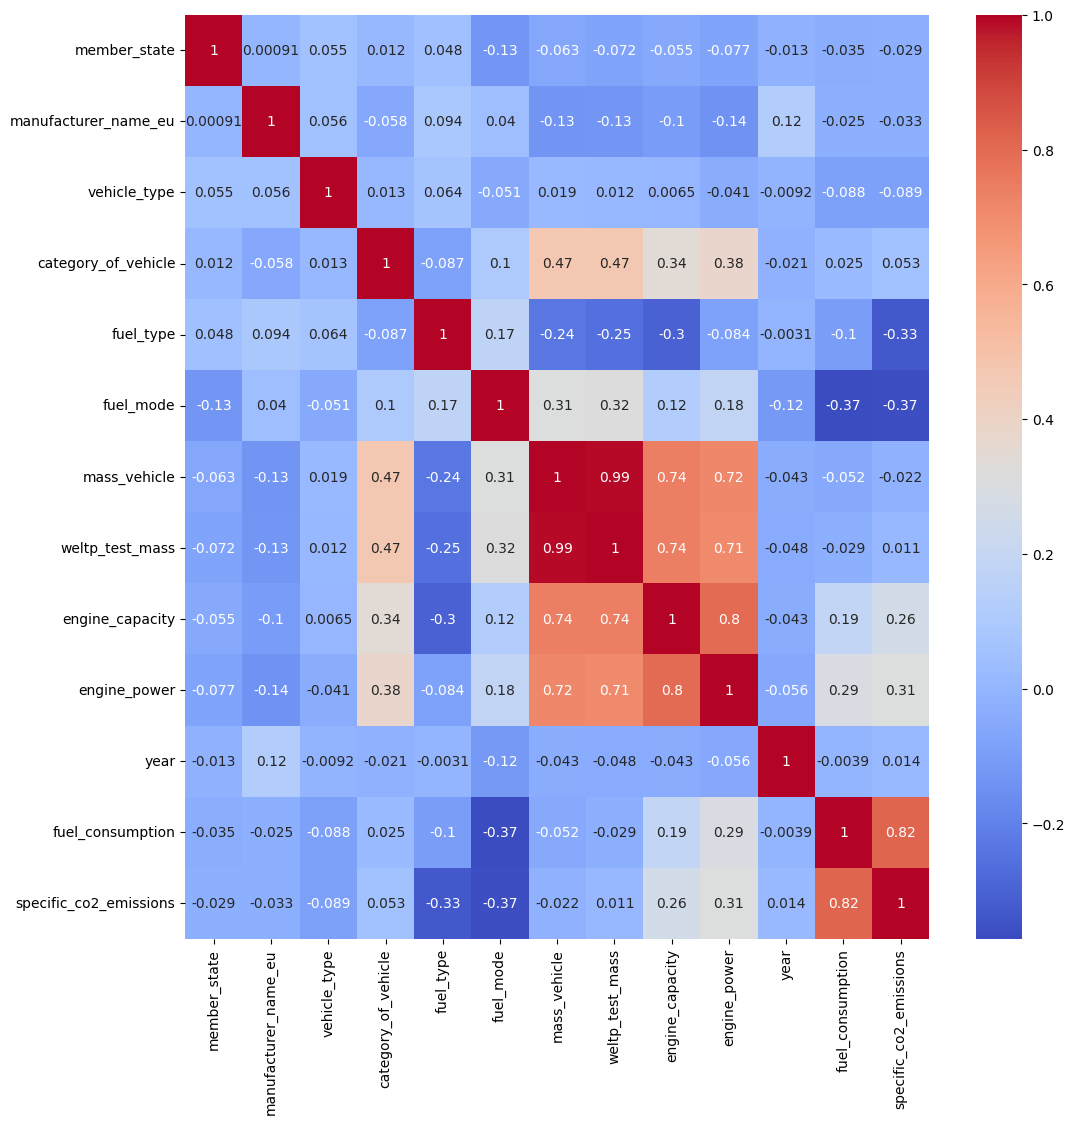

In [ ]:
cor = df_pe_cleaned.corr()
fig, ax = plt.subplots(figsize= (12,12))
sns.heatmap(cor, annot = True, ax = ax, cmap = "coolwarm")

In [9]:
X = df_pe_cleaned.drop(columns = ["specific_co2_emissions", "fuel_consumption" ])
y = df_pe_cleaned["fuel_consumption"]


In [10]:
# Split the data in train and a test setz
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
# to get a first impression of several models we could try
# very computing intensive
import lazypredict
from lazypredict.Supervised import LazyRegressor

clf = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)
print(models)

In [11]:
# Trying out LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# Testing LinearRegression for predicting the CO2-emission   

lr = LinearRegression()
lr.fit(X_train, y_train)

#score of LinearRegression
score_train = lr.score(X_train, y_train)
score_test = lr.score(X_test, y_test)
print("score_train:",score_train)
print("score_test:",score_test)

# mean squared Error
y_pred_tr = lr.predict(X_train)
y_pred_te = lr.predict(X_test)
mse_tr = mean_squared_error(y_pred_tr, y_train )
mse_te = mean_squared_error(y_pred_te, y_test)
print("mse training data: ", mse_tr)
print("mse test data: ", mse_te)


score_train: 0.432388701180334
score_test: 0.4328792295904961
mse training data:  1.5103079798668837
mse test data:  1.5124444832990753


In [12]:
#trying out RidgeCV
from sklearn.linear_model import RidgeCV
ridge_reg = RidgeCV(alphas =[0.001, 0.01, 0.1, 0.3, 0.7, 1, 10, 50, 100])
ridge_reg.fit(X_train, y_train)
print("alpha used:",ridge_reg.alpha_)
sc_train = ridge_reg.score(X_train, y_train)
sc_test = ridge_reg.score(X_test, y_test)
print("score: ", sc_test)
print("score: ", sc_train)

# mean squared Error
y_pred_tr = ridge_reg.predict(X_train)
y_pred_te = ridge_reg.predict(X_test)
mse_tr = mean_squared_error(y_pred_tr, y_train )
mse_te = mean_squared_error(y_pred_te, y_test)
print("mse training data: ", mse_tr)
print("mse test data: ", mse_te)

alpha used: 50.0
score:  0.4315511656637101
score:  0.4310954810103247
mse training data:  1.513748997948362
mse test data:  1.5159862738035665


In [13]:
#trying out lasso  regression
from sklearn.linear_model import LassoCV
lasso_r = LassoCV()
lasso_r.fit(X_train, y_train)
#lasso coefficients:
print(lasso_r.coef_)
print("alpha used: ", lasso_r.alpha_)

#scores
sc_train = lasso_r.score(X_train, y_train)
sc_test = lasso_r.score(X_test, y_test)
print("score: ", sc_test)
print("score: ", sc_train)

# mean squared Error
y_pred_tr = lasso_r.predict(X_train)
y_pred_te = lasso_r.predict(X_test)
mse_tr = mean_squared_error(y_pred_tr, y_train )
mse_te = mean_squared_error(y_pred_te, y_test)
print("mse training data: ", mse_tr)
print("mse test data: ", mse_te)


[-2.14944906e-03  4.24407388e-04 -5.23904426e-04  0.00000000e+00
 -1.59159457e-02 -4.53011214e-01 -1.16088429e-02  8.54132651e-03
  1.94920098e-04  2.15985021e-02 -0.00000000e+00]
alpha used:  0.18021858160272172
score:  0.40449572352932717
score:  0.4041083073067969
mse training data:  1.5855568423010886
mse test data:  1.5881399601688488
